In [1]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'],index=list(range(9)),dtype='datetime64[ns]'),
    'C' : pd.Series(randn(9),index=list(range(9)),dtype='float32'),
    'D' : np.array([3] * 9,dtype='int32'),
    'E' : pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'F' : ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['G'] = df_types['F'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<IPython.core.display.Javascript object>


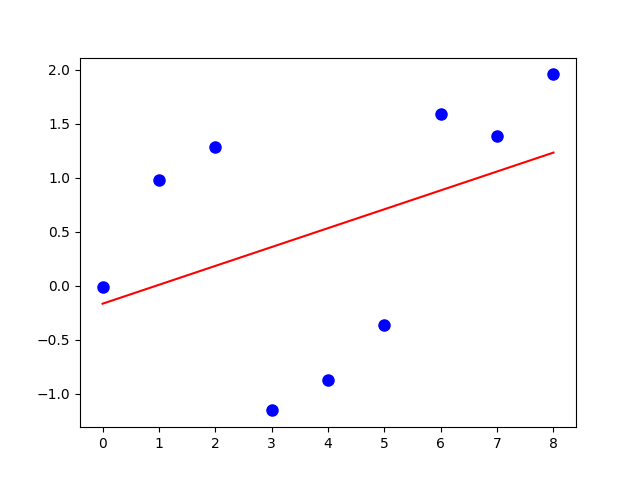

In [4]:
%matplotlib nbagg
import matplotlib.pyplot as plt

n = 50

qgrid_df = qgrid_widget.get_changed_df()
x = qgrid_df.index
y = qgrid_df['C']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
line, = ax.plot(x, fit[0] * x + fit[1], color='red')
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    qgrid_df = qgrid_widget.get_changed_df()
    x = qgrid_df.index
    y = qgrid_df['C']
    fit = np.polyfit(x, y, deg=1)
    line.set_data(x, fit[0] * x + fit[1])
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

qgrid_widget.on('filter_changed', handle_filter_changed)

In [3]:
qgrid_widget # render the qgrid widget again so we don't have to scroll to see the changes in the scatter plot


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…